# Insolation Figure

*This code was originally written by Anni Zhao (Peking) for her PhD thesis when she was at UCL with Chris. It has since been modified to look at the lig127k only and to focus on the high latitudes*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
import matplotlib.colors as colors

In [3]:
piline=[11,41,72,102,133,164,194,225,255,286,317,345]
mhline=[12,43,74,103,133,162,191,221,251,283,315,345]
ligline=[12,41,70,97,125,154,183,215,247,281,315,345]

#pimonth is differnce between values in piline
pimonth=[0]
for i in range(1,len(piline)):
    pimonth.append(piline[i]-piline[i-1])
pimonth[0] =365 -sum(pimonth)
print(pimonth)

ligmonth=[0]
for i in range(1,len(ligline)):
    ligmonth.append(ligline[i]-ligline[i-1])
ligmonth[0] =365 -sum(ligmonth)
print(ligmonth)


[31, 30, 31, 30, 31, 31, 30, 31, 30, 31, 31, 28]
[32, 29, 29, 27, 28, 29, 29, 32, 32, 34, 34, 30]


In [3]:
monlocation=[15,45,74,105,135,166,196,227,258,288,319,349]
monname=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


In [4]:
monlocation=[0,26,56,87,117,148,179,209,240,270,301,331,360]
monname=["Mar 21$^{st}$",'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar']
monlocation1=[0]


In [5]:
fi = xr.open_dataset('insolation180.nc',decode_times=False)
day=fi['day']
lat=fi['lat']
pi1=fi['piControl']
lig1=fi['lig127k']
mh1=fi['midHolocene']
lig=fi['lig127k']*0
mh=fi['midHolocene']*0
pi=fi['piControl']*0

In [6]:
LIG=np.zeros((180,365))
LIG[:,0:6]=lig1[:,365-6:365]
LIG[:,6:365]=lig1[:,0:365-6]
lig.values=LIG


In [7]:
LIG=np.zeros((180,365))
LIG[:,0:276]=lig1[:,89:365]
LIG[:,276:365]=lig1[:,0:89]
lig.values=LIG
MH=np.zeros((180,365))
MH[:,0:276]=mh1[:,89:365]
MH[:,276:365]=mh1[:,0:89]
mh.values=MH
PI=np.zeros((180,365))
PI[:,0:276]=pi1[:,89:365]
PI[:,276:365]=pi1[:,0:89]
pi.values=PI

In [5]:
pi.plot()
print(pi)

NameError: name 'pi' is not defined

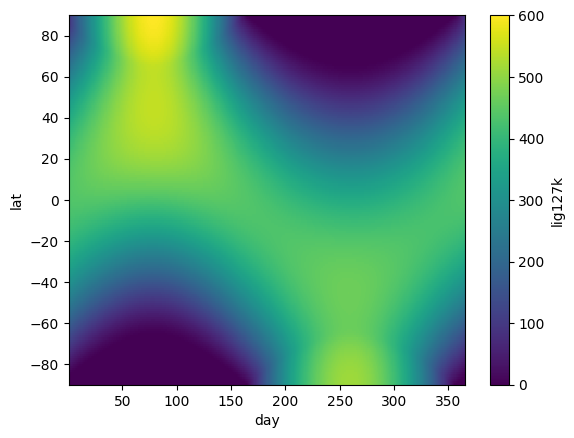

In [9]:
lig.plot()

In [10]:
check_lats=np.average(lig.lat[14:16])
check_lats

-75.0

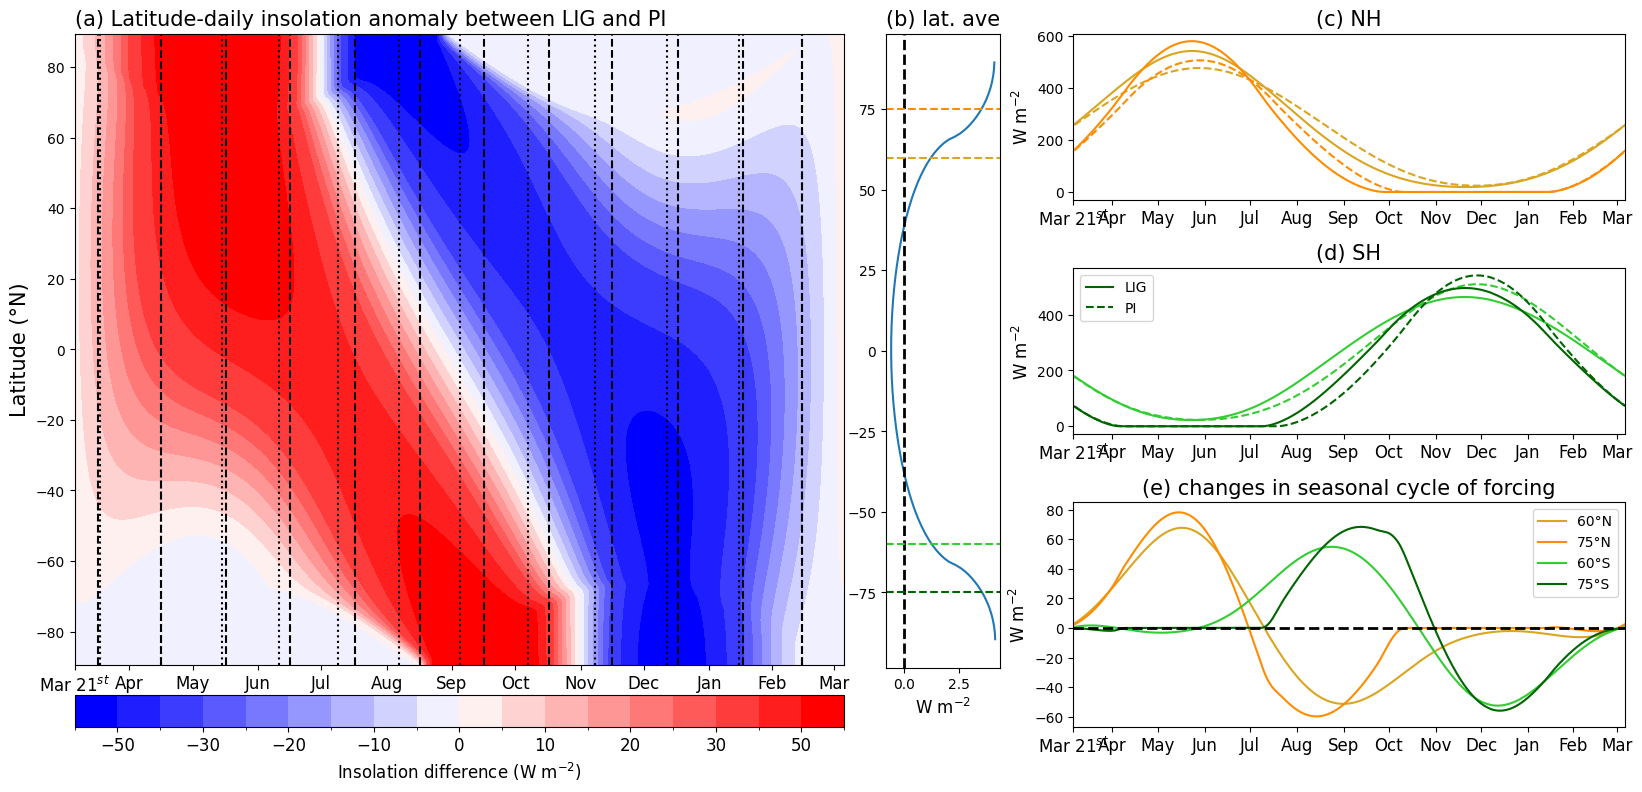

In [11]:
# lig
fig=plt.figure(figsize=(20,9))

cmap=plt.get_cmap('bwr')
bounds =[-200,-50,-40,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,40,50,200]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

ax1=plt.subplot2grid((12, 24), (0, 0),colspan=12, rowspan=12)
fig1=ax1.contourf(day,lat,lig-pi,levels=bounds,cmap=cmap,norm=norm)
ax1.set_xticks(monlocation)
ax1.set_xticklabels(monname, fontsize=12)
ax1.set_title('(a) Latitude-daily insolation anomaly between LIG and PI',loc='left',fontsize=15)
for i in range(12):
    ax1.axvline(x=piline[i],color='k',linestyle="dashed",linewidth=1.5)
    ax1.axvline(x=ligline[i],color='k',linestyle='dotted',linewidth=1.5)
ax1.set_ylabel('Latitude (%sN)'%chr(176),fontsize=15 )
divider = make_axes_locatable(ax1)
cax = divider.new_vertical(size="5%", pad=0.3, pack_start=True)
fig.add_axes(cax)
cb=fig.colorbar(fig1, cax=cax, orientation="horizontal")
cb.ax.tick_params(labelsize=12)
cblabel='Insolation difference (W m$^{-2}$)'
cb.set_label(cblabel,fontsize=12)

ax2=plt.subplot2grid((12, 25), (0, 13), rowspan=11,colspan=2)
fig2=ax2.plot(np.average(lig-pi,axis=1),lat)
ax2.axvline(x=0,color='black',linestyle="--",linewidth=2)
ax2.set_xlabel('W m$^{-2}$', fontsize=12)
ax2.set_title('(b) lat. ave',fontsize=15)
ax2.axhline(y=-60,color='limegreen',ls='dashed')
ax2.axhline(y=-75,color='darkgreen',ls='dashed')
ax2.axhline(y=60,color='goldenrod',ls='dashed')
ax2.axhline(y=75,color='darkorange',ls='dashed')
#ax2.set_ylabel('latitude (%sN)'%chr(176),fontsize=12 )

ax5=plt.subplot2grid((12, 25), (0, 16), rowspan=3,colspan=9)
ax5.plot(day,np.average(lig[149:151],axis=0),color='goldenrod',ls='solid')#,label='MH 60%sN'%(chr(176)))
ax5.plot(day,np.average(pi[149:151],axis=0),color='goldenrod',ls='dashed')#,label='PI 60%sN'%(chr(176)))
ax5.plot(day,np.average(lig[164:166],axis=0),color='darkorange',ls='solid')#,label='MH 75%sN'%(chr(176)))
ax5.plot(day,np.average(pi[164:166],axis=0),color='darkorange',ls='dashed')#,label='PI 75%sN'%(chr(176)))
ax5.set_xticks(monlocation)
ax5.set_xlim([0,365])
ax5.set_xticklabels(monname, fontsize=12)
ax5.set_title('(c) NH',fontsize=15)
ax5.set_ylabel('W m$^{-2}$', fontsize=12 )
#ax5.legend()

ax4=plt.subplot2grid((12, 25), (4, 16), rowspan=3,colspan=9)
ax4.plot(day,np.average(lig[29:31],axis=0),color='limegreen',ls='solid')#,label='MH 60%sS'%(chr(176)))
ax4.plot(day,np.average(pi[29:31],axis=0),color='limegreen',ls='dashed')#,label='PI 60%sS'%(chr(176)))
ax4.plot(day,np.average(lig[14:16],axis=0),color='darkgreen',ls='solid',label='LIG')#,label='MH 75%sS'%(chr(176)))
ax4.plot(day,np.average(pi[14:16],axis=0),color='darkgreen',ls='dashed',label='PI')#,label='PI 75%sS'%(chr(176)))
ax4.set_xlim([0,365])
ax4.set_xticks(monlocation)
ax4.set_xticklabels(monname, fontsize=12)
ax4.set_title('(d) SH',fontsize=15)
ax4.set_ylabel('W m$^{-2}$', fontsize=12 )
ax4.legend()


diff=np.array(lig-pi)

ax3=plt.subplot2grid((12, 25), (8, 16), rowspan=4,colspan=9)
ax3.plot(day,np.average(diff[149:151],axis=0),'goldenrod',label='60%sN'%(chr(176)))
ax3.plot(day,np.average(diff[164:166],axis=0),'darkorange',label='75%sN'%(chr(176)))
ax3.plot(day,np.average(diff[29:31],axis=0),'limegreen',label='60%sS'%(chr(176)))
ax3.plot(day,np.average(diff[14:16],axis=0),'darkgreen',label='75%sS'%(chr(176)))
ax3.set_xlim([0,365])
ax3.axhline(y=0,color='black',linestyle="--",linewidth=2)
ax3.set_xticks(monlocation)
ax3.set_xticklabels(monname, fontsize=12)
ax3.set_title('(e) changes in seasonal cycle of forcing',fontsize=15)
ax3.set_ylabel('W m$^{-2}$', fontsize=12 )

ax3.legend()



plt.savefig('lig_insolation.png')
plt.savefig('lig_insolation.pdf')  